## Visualize image-specific class saliency with backpropagation

---

The gradients obtained can be used to visualise an image-specific class saliency map, which can gives some intuition on regions within the input image that contribute the most (and least) to the corresponding output.

More details on saliency maps: [Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps](https://arxiv.org/pdf/1312.6034.pdf).

### 0. Set up

In [1]:
# Install flashtorch if you don't have it

# !pip install flashtorch

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os  # NOQA: E402

os.environ["CUDA_VISIBLE_DEVICES"] = "3"  # NOQA: E402

import matplotlib.pyplot as plt
import torchvision.models as models

from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

### 1. Load an image 

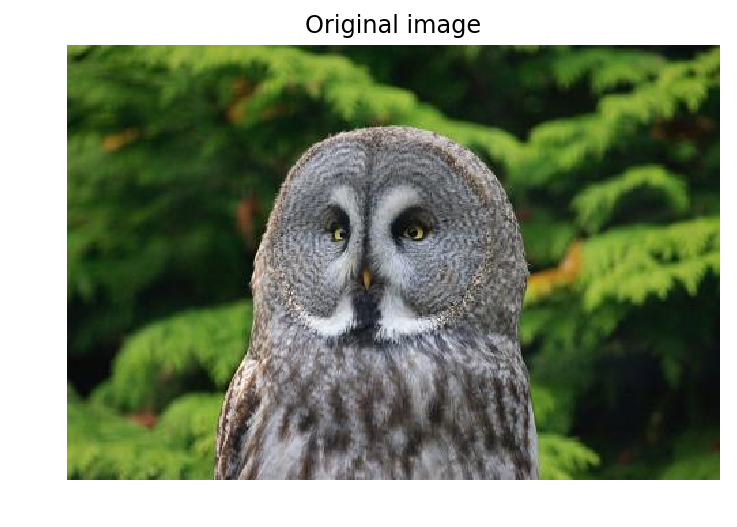

In [2]:
image = load_image('./images/great_grey_owl.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

### 2. Load a pre-trained Model

In [3]:
model = models.alexnet(pretrained=True)

### 3. Create an instance of Backprop with the model

In [4]:
backprop = Backprop(model)

### 4. Visualize saliency maps

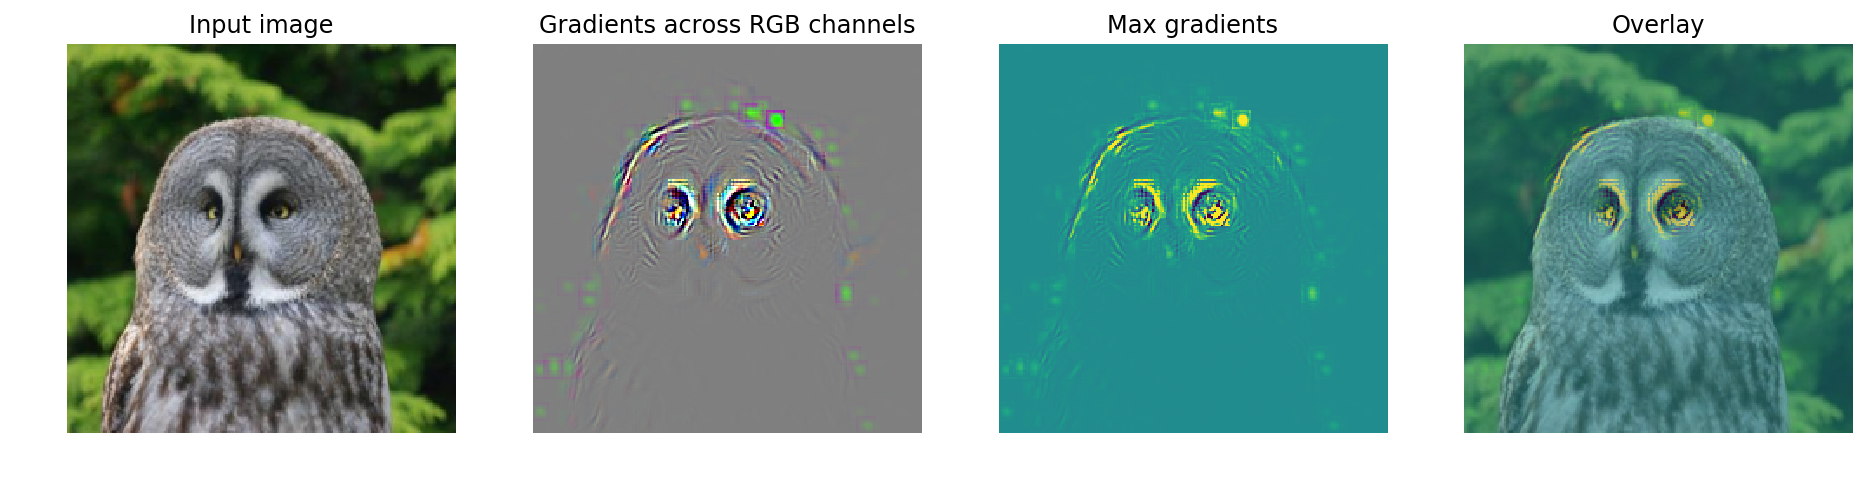

In [5]:
# Transform the input image to a tensor

owl = apply_transforms(image)

# Set a target class from ImageNet task: 24 in case of great gray owl

target_class = 24

# Ready to roll!

backprop.visualize(owl, target_class, guided=True)

### 5. What about other birds?

What makes peacock a peacock...?

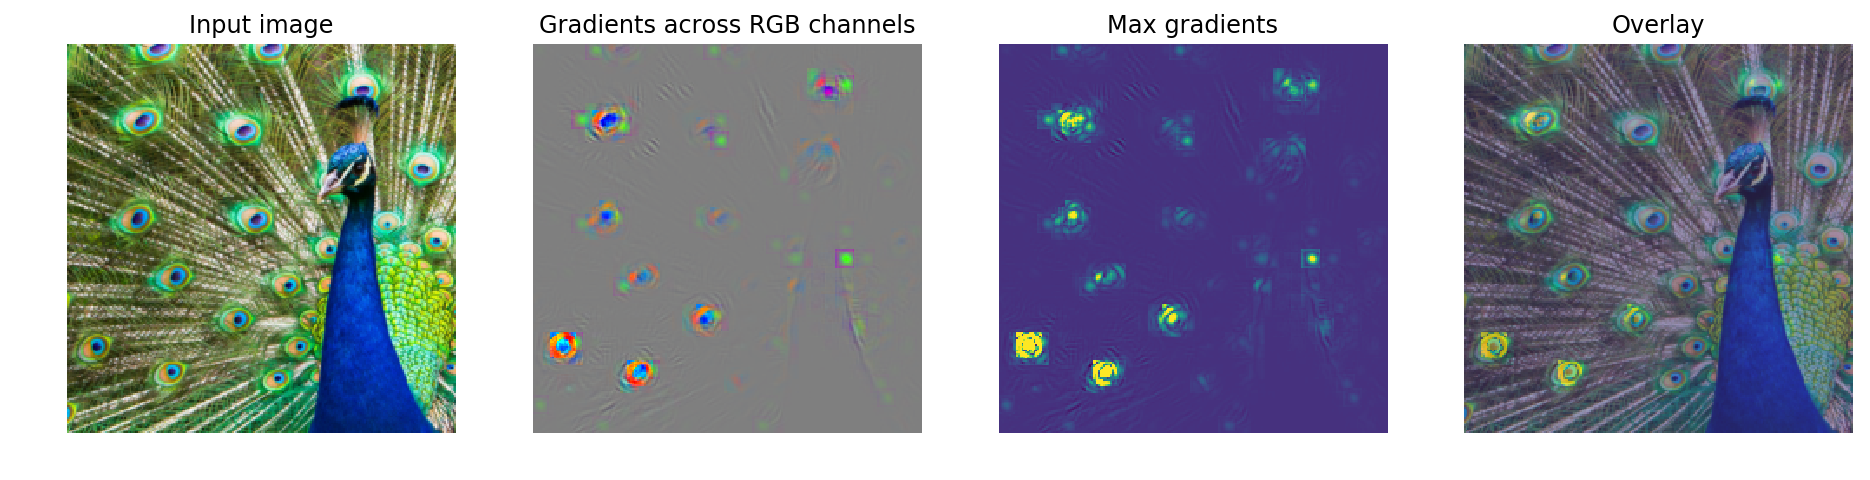

In [6]:

peacock = apply_transforms(load_image('./images/peacock.jpg'))
backprop.visualize(peacock, 84, guided=True)

Or a toucan?

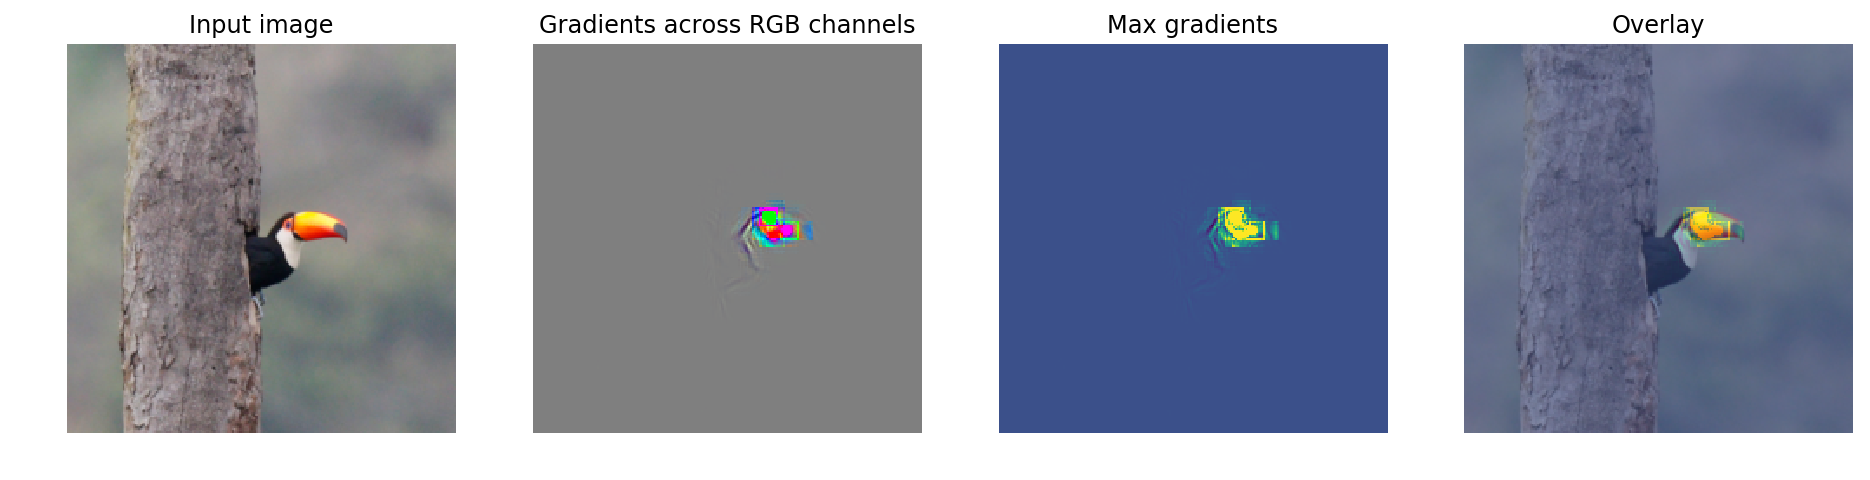

In [8]:
toucan = apply_transforms(load_image('./images/toucan.jpg'))
backprop.visualize(toucan, 96, guided=True)

Please try out other models/images too!